# 5.2 상관분석

피어슨 상관계수: 선형관계의 강도를 특정

스피어만 상관계수: 비선형 순위 상관관계를 측정

In [143]:
# 필요 라이브러리 로딩
import numpy as np
import pandas as pd

from scipy import stats # scipy: 수학 , 과학, 공학에 특화된 라이브러리 , 피어슨 , 스피어만 상관계수 

import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.datasets import load_boston# 사용할 예제 데이터  

# 보스턴 자료(비선형 >> 스피어만 상관관계 측정)
data = pd.read_excel('D:/KTdata/boston.xls')
hdata = pd.DataFrame(data)
df_house = hdata.copy()

# MLB Baseball dataset
health = pd.read_csv('D:/KTdata/health.csv',encoding='CP949')
df_health = health.copy()

In [144]:

df_health= df_health.sample(frac=1 , random_state= 0).reset_index(drop=True)# frac = 0.001 (0.1% )  random_state = 0 전부  

df_health.head()

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),...,혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석
0,2023,1508075,11,2,15,150,50,70.0,0.6,0.3,...,12.0,30.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN
1,2023,3039397,28,1,8,185,110,102.4,1.0,0.8,...,38.0,23.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
2,2023,2700381,11,1,8,175,100,97.0,1.0,1.2,...,49.0,21.0,2.0,1.0,1,0.0,NaN,NaN,NaN,0.0
3,2023,4143617,26,1,5,175,60,71.6,1.0,1.0,...,14.0,21.0,1.0,1.0,1,0.0,NaN,NaN,NaN,0.0
4,2023,3840017,28,1,8,165,55,73.0,0.9,2.0,...,15.0,16.0,2.0,1.0,1,0.0,NaN,NaN,NaN,1.0


## 산점도를 이용한 허리둘레와 총 콜레스테롤과 관계 확인

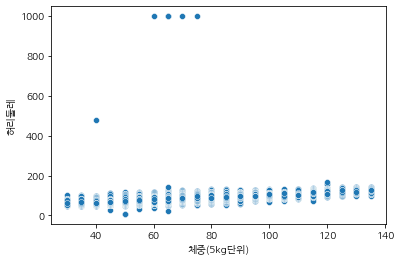

In [145]:
sns.scatterplot(x=df_health['체중(5kg단위)'], y=df_health['허리둘레'])

plt.show() # 허리둘레에 이상치가 발견됨  따라서 정상 범주 내로 

In [146]:
# 이상치 제거 IQR 
# 1사분위수(Q1)와 3사분위수(Q3) 계산
Q1 = df_health['체중(5kg단위)'].quantile(0.25)
Q3 = df_health['체중(5kg단위)'].quantile(0.75)

# IQR 계산
IQR = Q3 - Q1

# 하한과 상한 계산
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 필터링
df_health = df_health[(df_health['체중(5kg단위)'] > lower_bound) & (df_health['체중(5kg단위)'] < upper_bound)]

In [147]:
# 이상치 제거 IQR 
# 1사분위수(Q1)와 3사분위수(Q3) 계산
Q1 = df_health['허리둘레'].quantile(0.25)
Q3 = df_health['허리둘레'].quantile(0.75)

# IQR 계산
IQR = Q3 - Q1

# 하한과 상한 계산
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 필터링
df_health = df_health[(df_health['허리둘레'] > lower_bound) & (df_health['허리둘레'] < upper_bound)]

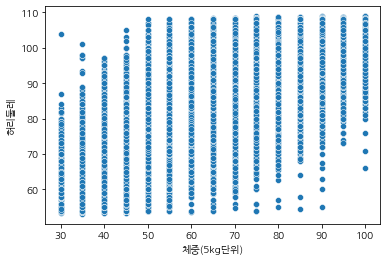

In [148]:
sns.scatterplot(x=df_health['체중(5kg단위)'], y=df_health['허리둘레'])
plt.show() 

체중과 허리둘레간 강한 양의 상관관계가 있는걸로 추정됨

## 정규성 확인

In [149]:
# 정규성을 만족하는지 확인 
print('체중 Shapiro Test : ', stats.shapiro(df_health['체중(5kg단위)']) )
print('허리둘레 Shapiro Tes: ', stats.shapiro(df_health['허리둘레']) )

체중 Shapiro Test :  ShapiroResult(statistic=0.971172777784065, pvalue=4.3471487186587815e-116)
허리둘레 Shapiro Tes:  ShapiroResult(statistic=0.9956197589889393, pvalue=5.07686094564969e-69)


c:\Users\Yang\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 983434.
  res = hypotest_fun_out(*samples, **kwds)


- 체중과 허리둘레 모두 p-value가 매우 낮음 즉 귀무가설을 기각 

=> 체중과 허리둘레는 정규분포를 따르지 않는다  

## 피어슨 상관계수 산출 

H0: 체중과 허리둘레는 선형적 관계가 없다

H1: 체중과 허리둘레는 선형적 관계가 있다

In [151]:
# 피어슨상관계수 함수
stats.pearsonr(df_health['체중(5kg단위)'] ,df_health['허리둘레']) 

PearsonRResult(statistic=0.7960133175174007, pvalue=0.0)

p-value가 매우 낮음 > 귀무가설을 기각 , 대립가설을 채택
> 결론: 체중과 허리둘레는 선형적 관계가 있음

## 비선형 순위 상관 

In [152]:
df_house

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0


## 특정 지역 하위계층(LSTAT)과 해당지역 집값(MEDV)과의 관계 확인

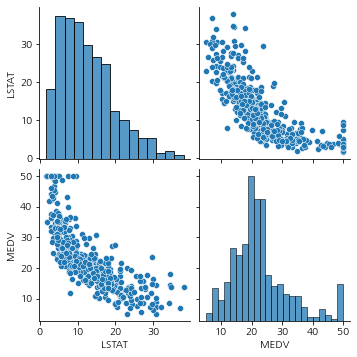

In [156]:
sns.pairplot(df_house[['LSTAT','MEDV']])
plt.show()

- 산점도: 비선형 관계 포착
- 히스토그램:  정규분포를 따르지 않음

두가지 방안
 1. log 변환
 2. (비모수) 스피어만 순위 상관분석

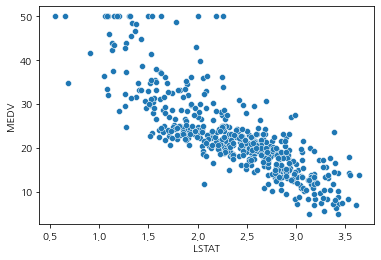

In [157]:
# 로그 변환으로 선형화 후 산점도 확인 
sns.scatterplot(x=np.log(df_house['LSTAT']) ,y=df_house['MEDV'])
plt.show()

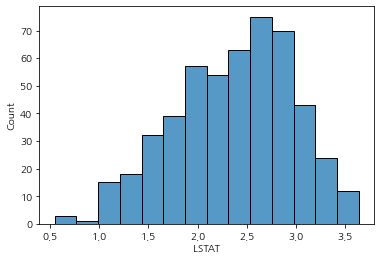

In [159]:
# 로그 변환후 LSTAT 분포 확인 
sns.histplot(np.log(df_house['LSTAT']))
plt.show()

In [160]:
stats.shapiro(np.log(df_house['LSTAT'])) # 정규성 가정 충족 실패

ShapiroResult(statistic=0.9861662716407642, pvalue=9.802307309626944e-05)

## 비선형 순위 상관 스피어만

In [161]:
stats.spearmanr(df_house['LSTAT'],df_house['MEDV'])

SignificanceResult(statistic=-0.8529141394922163, pvalue=2.221727524313283e-144)

In [162]:
stats.pearsonr(df_house['LSTAT'],df_house['MEDV'])

PearsonRResult(statistic=-0.7376627261740147, pvalue=5.081103394388513e-88)

- 분포를 고려했을 때, 스피어맨 상관계수가 순위를 고려하여 피어슨에 비해 더 적합한 상관성을 가지고 있음 